<a href="https://colab.research.google.com/github/amiegirl/Hamoye/blob/master/Hamoye_Stage_E_Practical_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Time_series_analysis_and_forecast_DATASET.csv')
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [3]:
df.shape

(92016, 5)

In [4]:
df.dtypes

FullDate      object
Tmax         float64
SysLoad      float64
GasPrice     float64
ElecPrice    float64
dtype: object

In [5]:
df.isna().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

Text(0, 0.5, 'ElecPrice')

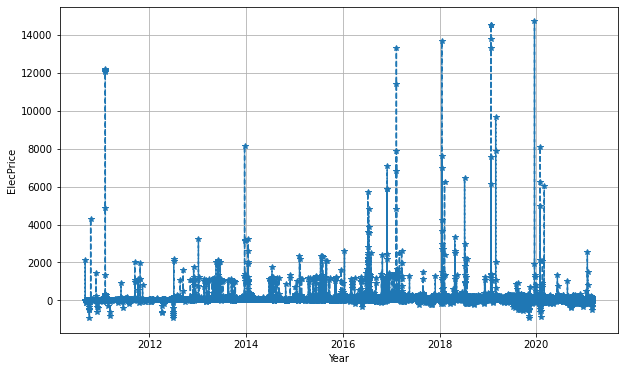

In [6]:
df['FullDate']=pd.to_datetime(df['FullDate'])
df.set_index( "FullDate",inplace= True )
plt.figure(figsize=( 10 , 6 )) 
plt.plot(df.index, df.ElecPrice, '--' , marker= '*' ,) 
plt.grid() 
plt.xlabel( 'Year' ) 
plt.ylabel( 'ElecPrice' )

In [7]:
#downsample to daily data points 
df_daily = df.resample('D').sum()
df_daily.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


In [8]:
df_daily.shape

(3834, 4)

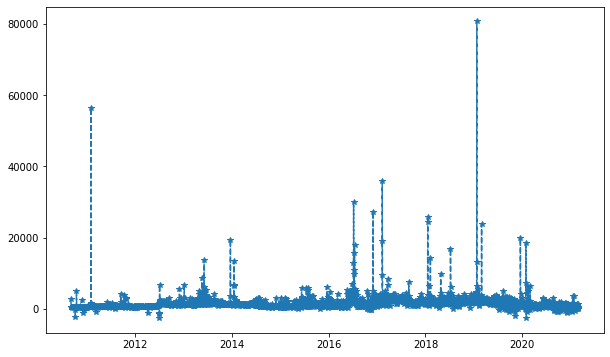

In [10]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(df_daily.index, df_daily.ElecPrice, '--' , marker= '*' ,) 

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_daily['SysLoad']) 
print(f'ADF Statistic: {adf_result[0]}') 
print(f'p-value: {adf_result[1]}') 
print(f'No. of lags used: {adf_result[2]}') 
print(f'No. of observations used: {adf_result[3]}') 
print('Critical Values:')
for k, v in adf_result[4].items(): 
      print(f'{k}: {v}') 

ADF Statistic: -3.6901589888366457
p-value: 0.004253725504574117
No. of lags used: 30
No. of observations used: 3803
Critical Values:
1%: -3.432070672988693
5%: -2.8623002987378547
10%: -2.567174716967499


In [ ]:
adf_result = adfuller(df_daily['GasPrice']) 
print(f'ADF Statistic: {adf_result[0]}') 
print(f'p-value: {adf_result[1]}') 
print(f'No. of lags used: {adf_result[2]}') 
print(f'No. of observations used: {adf_result[3]}') 
print('Critical Values:')
for k, v in adf_result[4].items(): 
      print(f'{k}: {v}') 

ADF Statistic: -2.90276669716518
p-value: 0.04502721288462542
No. of lags used: 27
No. of observations used: 3806
Critical Values:
1%: -3.4320693157877544
5%: -2.8622996992165364
10%: -2.5671743978048323


In [ ]:
adf_result = adfuller(df_daily['ElecPrice']) 
print(f'ADF Statistic: {adf_result[0]}') 
print(f'p-value: {adf_result[1]}') 
print(f'No. of lags used: {adf_result[2]}') 
print(f'No. of observations used: {adf_result[3]}') 
print('Critical Values:')
for k, v in adf_result[4].items(): 
      print(f'{k}: {v}') 

ADF Statistic: -8.269053866873803
p-value: 4.848817773711633e-13
No. of lags used: 20
No. of observations used: 3813
Critical Values:
1%: -3.432066157296446
5%: -2.8622983040036005
10%: -2.5671736550459663


In [ ]:
df_daily.reset_index(inplace=True)

In [ ]:
# Preparing Data for univariate analysis
df_uni = df_daily[['FullDate','ElecPrice']]

In [ ]:
# Renaming the columns of the new dataframe
new_df = df_uni.rename(columns={"FullDate": "ds", "ElecPrice": "y"})

In [ ]:
x_train = new_df.iloc[:2757]
x_test = new_df.iloc[2757:]

In [ ]:
x_test.shape,x_train.shape

((1077, 2), (2757, 2))

In [ ]:
x_train.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [ ]:
# building the model
from fbprophet import Prophet
model = Prophet()

In [ ]:
# fitting the model
model.fit(x_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# predicting the test data
future = model.make_future_dataframe(periods=1077, freq= 'D' )
pred = model.predict(future)

In [ ]:
pred = model.predict(x_test)
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2691.764386,157.695979,5006.076004,2691.764386,2691.764386,-155.426892,-155.426892,-155.426892,9.749221,9.749221,9.749221,-165.176114,-165.176114,-165.176114,0.0,0.0,0.0,2536.337494
1,2018-03-21,2692.580955,326.559328,5200.879648,2692.580955,2692.580955,-2.925496,-2.925496,-2.925496,159.308129,159.308129,159.308129,-162.233625,-162.233625,-162.233625,0.0,0.0,0.0,2689.655459
2,2018-03-22,2693.397524,336.875705,5275.333937,2693.397524,2693.397524,95.308217,95.308217,95.308217,257.036327,257.036327,257.036327,-161.728110,-161.728110,-161.728110,0.0,0.0,0.0,2788.705741
3,2018-03-23,2694.214093,136.494438,5073.008124,2694.214093,2694.214093,-113.236873,-113.236873,-113.236873,50.257478,50.257478,50.257478,-163.494350,-163.494350,-163.494350,0.0,0.0,0.0,2580.977221
4,2018-03-24,2695.030663,-88.276810,4717.914643,2695.030663,2695.030663,-438.662722,-438.662722,-438.662722,-271.372061,-271.372061,-271.372061,-167.290660,-167.290660,-167.290660,0.0,0.0,0.0,2256.367941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,2021-02-24,3567.126543,325.758060,6439.600899,1765.690402,5256.622736,-91.262777,-91.262777,-91.262777,159.308129,159.308129,159.308129,-250.570906,-250.570906,-250.570906,0.0,0.0,0.0,3475.863766
1073,2021-02-25,3567.943112,528.480802,6531.814433,1766.275171,5260.265854,-25.199382,-25.199382,-25.199382,257.036327,257.036327,257.036327,-282.235709,-282.235709,-282.235709,0.0,0.0,0.0,3542.743730
1074,2021-02-26,3568.759681,333.469680,6111.267506,1766.859939,5264.863274,-259.098963,-259.098963,-259.098963,50.257478,50.257478,50.257478,-309.356441,-309.356441,-309.356441,0.0,0.0,0.0,3309.660718
1075,2021-02-27,3569.576250,-158.223605,5911.600597,1767.444708,5269.393985,-603.110641,-603.110641,-603.110641,-271.372061,-271.372061,-271.372061,-331.738579,-331.738579,-331.738579,0.0,0.0,0.0,2966.465610


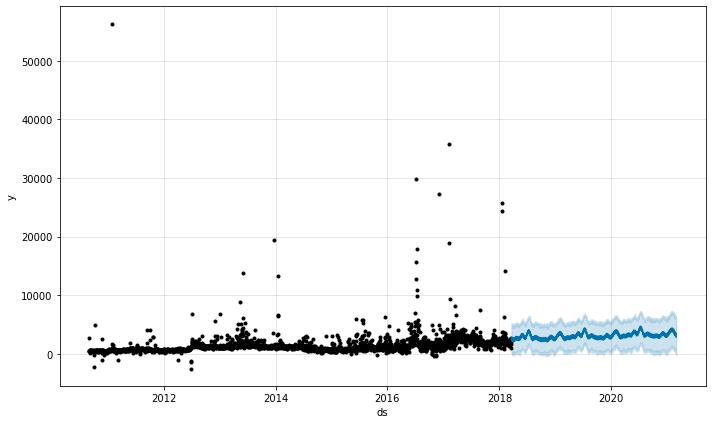

In [ ]:
# Plotting the Graph
model.plot(pred)
plt.show()

In [ ]:
#MAPE
from sklearn.metrics import mean_squared_error
y_true, y_pred = np.array(x_test['y']),np.array(pred['yhat'])
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
round(mape,2)

549.48

In [ ]:
#RMSE
np.sqrt(mean_squared_error(x_test['y'],pred['yhat']))

3218.15577651241

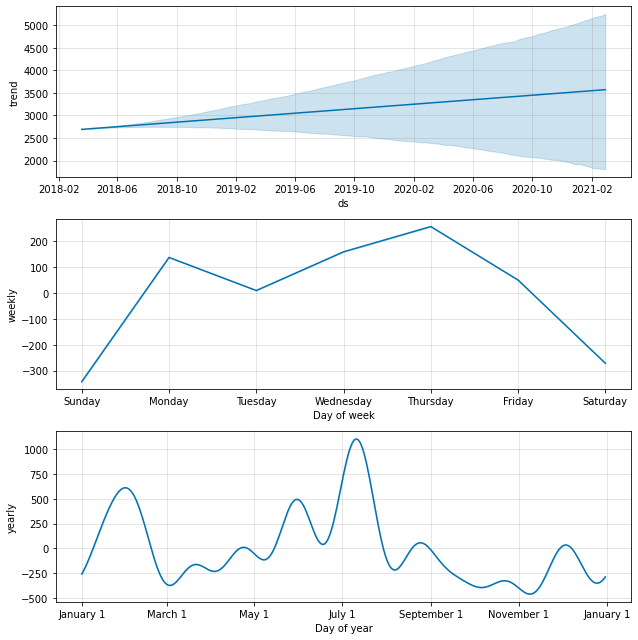

In [ ]:
model.plot_components(pred);

In [ ]:
#Multivariate analysis

# making a new dataframe from df_daily & renaming the columns
df_daily_mult = df_daily.copy()
df_daily_mult.head()


,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [ ]:
df_daily_mul= df_daily_mult.rename(columns={"FullDate": "ds", "ElecPrice": "y","SysLoad": "add1","Tmax": "add2","GasPrice": "add3"})
df_daily_mul

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.38000,88.5600,2751.700
1,2010-09-02,369.6,38898.99000,88.5600,570.810
2,2010-09-03,439.2,41665.76000,106.8000,504.975
3,2010-09-04,328.8,35638.08500,81.3600,502.275
4,2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...,...
3829,2021-02-24,537.6,-1525.49745,134.4000,634.770
3830,2021-02-25,518.4,4539.07855,130.5048,577.515
3831,2021-02-26,547.2,9517.02430,130.1808,1445.495
3832,2021-02-27,564.0,4932.88015,130.0800,488.980


In [ ]:
x_train_mult = df_daily_mul.iloc[:2757,:]
x_test_mult = df_daily_mul.iloc[2757:,:]

In [ ]:
model_mult = Prophet()
model_mult.add_regressor('add1')
model_mult.add_regressor('add2')
model_mult.add_regressor('add3')
model_mult.fit(x_train_mult)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
pred_mult = model.predict(x_test_mult)

In [ ]:
future_mult = model_mult.make_future_dataframe(periods=1077,freq='D')
future_mult['add1'] = df_daily_mul['add1'].values
future_mult['add2'] = df_daily_mul['add2'].values
future_mult['add3'] = df_daily_mul['add3'].values
pred_mult= model_mult.predict(future_mult)


In [ ]:
future_mult.shape

(3834, 4)

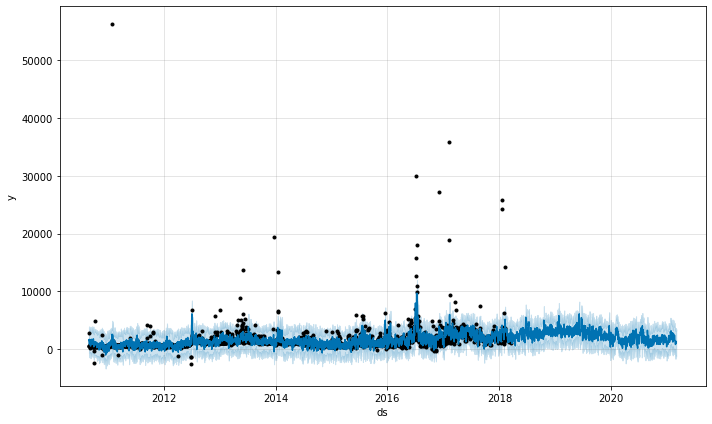

In [ ]:
model_mult.plot(pred_mult)
plt.show()

In [ ]:
y_true, y_pred = np.array(x_test_mult['y'][-1077:]),np.array(pred_mult['yhat'][-1077:])
mape_mult = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
round(mape_mult,2)

233.74

In [ ]:
#RMSE
np.sqrt(mean_squared_error(x_test_mult['y'][-1077:],pred_mult['yhat'][-1077:]))

2709.6493421662344

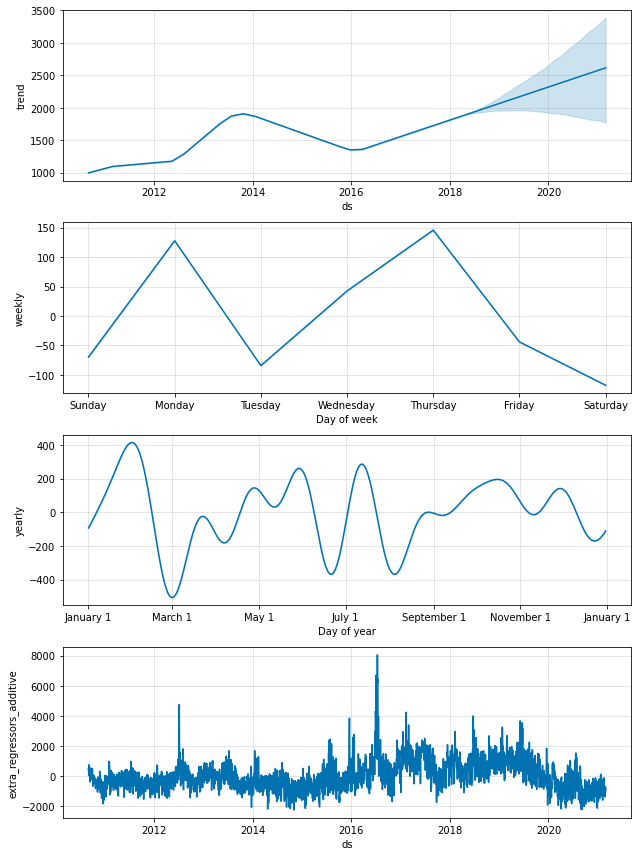

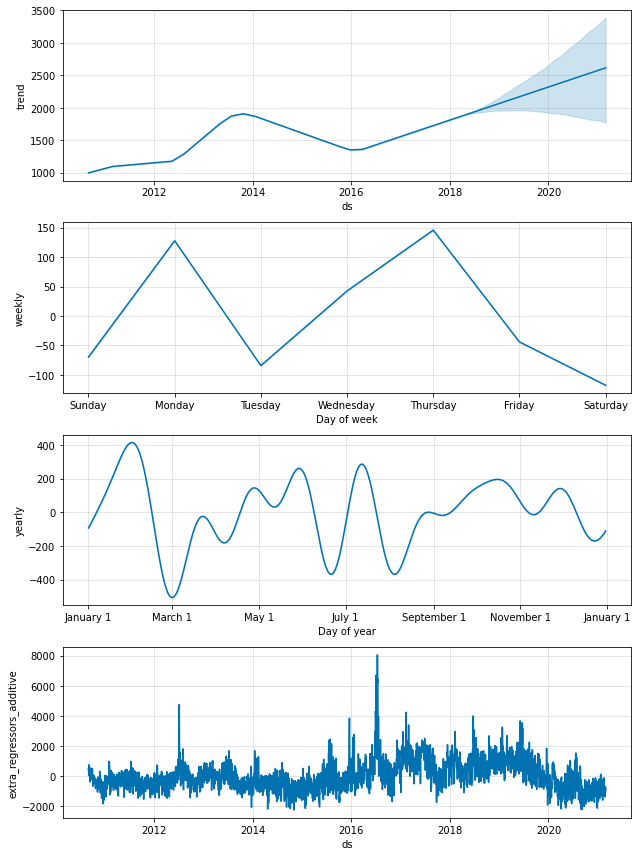

In [ ]:
model_mult.plot_components(pred_mult)

In [ ]:
#Excluding Tmax
df_daily_mul= df_daily_mult.rename(columns={"FullDate": "ds", "ElecPrice": "y","SysLoad": "add1","GasPrice": "add2"})
df_daily_mul

,ds,Tmax,add1,add2,y
0,2010-09-01,379.2,41565.38000,88.5600,2751.700
1,2010-09-02,369.6,38898.99000,88.5600,570.810
2,2010-09-03,439.2,41665.76000,106.8000,504.975
3,2010-09-04,328.8,35638.08500,81.3600,502.275
4,2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...,...
3829,2021-02-24,537.6,-1525.49745,134.4000,634.770
3830,2021-02-25,518.4,4539.07855,130.5048,577.515
3831,2021-02-26,547.2,9517.02430,130.1808,1445.495
3832,2021-02-27,564.0,4932.88015,130.0800,488.980


In [ ]:
#Dropping Tmax
df_daily_mul.drop(['Tmax'], axis = 1)

,ds,add1,add2,y
0,2010-09-01,41565.38000,88.5600,2751.700
1,2010-09-02,38898.99000,88.5600,570.810
2,2010-09-03,41665.76000,106.8000,504.975
3,2010-09-04,35638.08500,81.3600,502.275
4,2010-09-05,35611.41000,106.8000,500.555
...,...,...,...,...
3829,2021-02-24,-1525.49745,134.4000,634.770
3830,2021-02-25,4539.07855,130.5048,577.515
3831,2021-02-26,9517.02430,130.1808,1445.495
3832,2021-02-27,4932.88015,130.0800,488.980


In [ ]:
x_train_mult = df_daily_mul.iloc[:2757,:]
x_test_mult = df_daily_mul.iloc[2757:,:]

In [ ]:
model_mult = Prophet()
model_mult.add_regressor('add1')
model_mult.add_regressor('add2')
model_mult.fit(x_train_mult)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
pred_mult = model.predict(x_test_mult)

In [ ]:
future_mult = model_mult.make_future_dataframe(periods=1077,freq='D')
future_mult['add1'] = df_daily_mul['add1'].values
future_mult['add2'] = df_daily_mul['add2'].values
pred_mult= model_mult.predict(future_mult)

In [ ]:
y_true, y_pred = np.array(x_test_mult['y'][-1077:]),np.array(pred_mult['yhat'][-1077:])
mape_mult = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
round(mape_mult,2)

236.66